In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
path = os.getcwd()
path

'/content'

In [3]:
!pip install pandas "gluonts[mxnet, torch]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.1/778.1 kB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 42.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6

In [1]:
%pip install -r /content/drive/MyDrive/Colab Notebooks/ISAZI/requirements.txt

ERROR: Invalid requirement: 'Notebooks/ISAZI/requirements.txt'
Hint: It looks like a path. File 'Notebooks/ISAZI/requirements.txt' does not exist.


In [1]:
import json  # Standard library for working with JSON data

import pandas as pd  # Powerful data manipulation and analysis library
import numpy as np  # Library for numerical computations
np.bool = np.bool_
import matplotlib.pyplot as plt  # Library for creating static, animated, and interactive visualizations
import seaborn as sns  # Data visualization library based on matplotlib, provides a high-level interface for drawing attractive and informative statistical graphics

from sklearn.model_selection import train_test_split  # Utility for splitting the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler  # Utility for standardizing features by removing the mean and scaling to unit variance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Metrics for evaluating the performance of a regression model

from gluonts.dataset.pandas import PandasDataset  # GluonTS utility for creating datasets from pandas dataframes
from gluonts.evaluation.backtest import make_evaluation_predictions  # Utility for generating evaluation predictions from a trained model
from gluonts.evaluation import Evaluator  # Utility for evaluating the performance of time series forecasting models

from gluonts.mx import SimpleFeedForwardEstimator, Trainer # GluonTS classes for creating and training a simple feed-forward neural network model


/usr/local/lib/python3.10/dist-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [14]:
# Dataset paths and column definitions
time_series_id_col = 'product_code'
date_col = 'sales_date'
target_col = 'volume'
freq = "1D"
prediction_length = 28
#feature_cols = ['is_promo', 'rel_promo_price', 'rsp','is_multibuy_promo','day','month']
data_path = "/content/drive/MyDrive/Colab Notebooks/ISAZI/isazi_ts_dataset.csv"

In [15]:
# Load the dataset
df = pd.read_csv(data_path)
# Display the first few rows of the dataset
df

,Unnamed: 0,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code
0,0,2022-05-01,61.0,1.0000,0,0,0,32.9500,NaN,1
1,1,2022-05-01,102.0,1.0000,0,0,0,40.1204,NaN,2
2,2,2022-05-01,52.0,1.0000,0,0,0,32.7825,NaN,3
3,3,2022-05-01,309.0,0.9091,1,0,0,41.3318,0.0001,4
4,4,2022-05-01,106.0,0.9091,1,0,0,44.6441,0.0001,5
...,...,...,...,...,...,...,...,...,...,...
300763,300763,2024-06-05,63.0,0.8333,1,0,1,77.9900,107.7537,156
300764,300764,2024-06-05,26.0,1.0000,0,0,0,77.4567,NaN,147
300765,300765,2024-06-05,71.0,1.0000,0,0,0,18.0111,NaN,85
300766,300766,2024-06-05,0.0,1.0000,0,0,0,35.9900,NaN,98


In [16]:
# Check for missing values
print("Missing values:")
df.isnull().sum()

Missing values:


Unnamed: 0                    0
sales_date                    0
volume                        0
rel_promo_price               0
is_promo                      0
is_single_price_promo         0
is_multibuy_promo             0
rsp                           0
planned_promo_vol        152034
product_code                  0
dtype: int64

In [6]:
#get unique product
print("Number of Unique Products:")
df['product_code'].unique().sum()

Number of Unique Products:


84666

In [17]:
# Convert 'sales_date' to datetime
df['sales_date'] = pd.to_datetime(df['sales_date'])
print("Dataset after data type conversions:")
df.dtypes

Dataset after data type conversions:


Unnamed: 0                        int64
sales_date               datetime64[ns]
volume                          float64
rel_promo_price                 float64
is_promo                          int64
is_single_price_promo             int64
is_multibuy_promo                 int64
rsp                             float64
planned_promo_vol               float64
product_code                      int64
dtype: object

In [18]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

print("Dataset after removing duplicates:")
df

Dataset after removing duplicates:


,Unnamed: 0,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code
0,0,2022-05-01,61.0,1.0000,0,0,0,32.9500,NaN,1
1,1,2022-05-01,102.0,1.0000,0,0,0,40.1204,NaN,2
2,2,2022-05-01,52.0,1.0000,0,0,0,32.7825,NaN,3
3,3,2022-05-01,309.0,0.9091,1,0,0,41.3318,0.0001,4
4,4,2022-05-01,106.0,0.9091,1,0,0,44.6441,0.0001,5
...,...,...,...,...,...,...,...,...,...,...
300763,300763,2024-06-05,63.0,0.8333,1,0,1,77.9900,107.7537,156
300764,300764,2024-06-05,26.0,1.0000,0,0,0,77.4567,NaN,147
300765,300765,2024-06-05,71.0,1.0000,0,0,0,18.0111,NaN,85
300766,300766,2024-06-05,0.0,1.0000,0,0,0,35.9900,NaN,98


In [19]:
# Handle missing values (if any)
df.ffill()
df

,Unnamed: 0,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code
0,0,2022-05-01,61.0,1.0000,0,0,0,32.9500,NaN,1
1,1,2022-05-01,102.0,1.0000,0,0,0,40.1204,NaN,2
2,2,2022-05-01,52.0,1.0000,0,0,0,32.7825,NaN,3
3,3,2022-05-01,309.0,0.9091,1,0,0,41.3318,0.0001,4
4,4,2022-05-01,106.0,0.9091,1,0,0,44.6441,0.0001,5
...,...,...,...,...,...,...,...,...,...,...
300763,300763,2024-06-05,63.0,0.8333,1,0,1,77.9900,107.7537,156
300764,300764,2024-06-05,26.0,1.0000,0,0,0,77.4567,NaN,147
300765,300765,2024-06-05,71.0,1.0000,0,0,0,18.0111,NaN,85
300766,300766,2024-06-05,0.0,1.0000,0,0,0,35.9900,NaN,98


In [20]:
# Check for missing values
print(df.isnull().sum())

# Option 1: Fill missing values
df['planned_promo_vol'] = df['planned_promo_vol'].fillna(0)

Unnamed: 0                    0
sales_date                    0
volume                        0
rel_promo_price               0
is_promo                      0
is_single_price_promo         0
is_multibuy_promo             0
rsp                           0
planned_promo_vol        152034
product_code                  0
dtype: int64


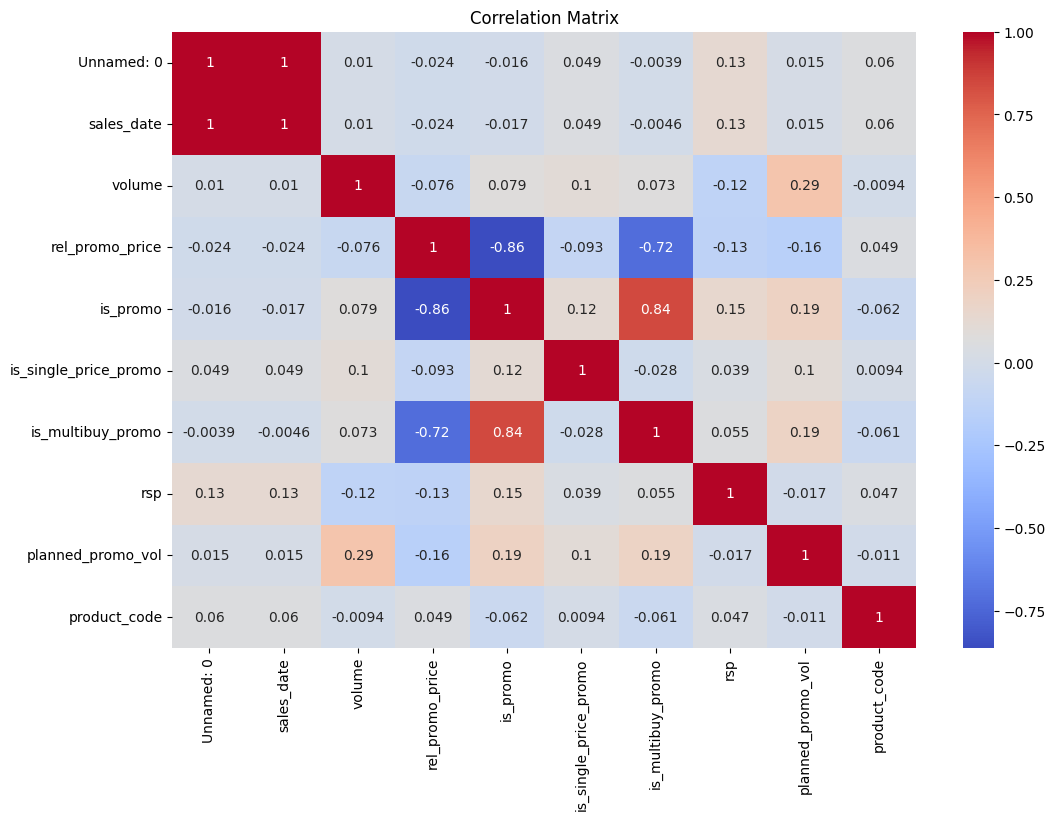

In [21]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Extract additional time features
df['year'] = df['sales_date'].dt.year
df['month'] = df['sales_date'].dt.month
df['day'] = df['sales_date'].dt.day
df['dayofweek'] = df['sales_date'].dt.dayofweek
df

,Unnamed: 0,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code,year,month,day,dayofweek
0,0,2022-05-01,61.0,1.0000,0,0,0,32.9500,0.0000,1,2022,5,1,6
1,1,2022-05-01,102.0,1.0000,0,0,0,40.1204,0.0000,2,2022,5,1,6
2,2,2022-05-01,52.0,1.0000,0,0,0,32.7825,0.0000,3,2022,5,1,6
3,3,2022-05-01,309.0,0.9091,1,0,0,41.3318,0.0001,4,2022,5,1,6
4,4,2022-05-01,106.0,0.9091,1,0,0,44.6441,0.0001,5,2022,5,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300763,300763,2024-06-05,63.0,0.8333,1,0,1,77.9900,107.7537,156,2024,6,5,2
300764,300764,2024-06-05,26.0,1.0000,0,0,0,77.4567,0.0000,147,2024,6,5,2
300765,300765,2024-06-05,71.0,1.0000,0,0,0,18.0111,0.0000,85,2024,6,5,2
300766,300766,2024-06-05,0.0,1.0000,0,0,0,35.9900,0.0000,98,2024,6,5,2


In [23]:
df[df['product_code']==1]['planned_promo_vol'].unique()

array([0.])

In [24]:
mean_promo_vol = df.groupby('product_code')['planned_promo_vol'].mean()

In [25]:
mean_promo_vol_map = mean_promo_vol.to_dict()

In [26]:
count_promo_vol = df.groupby('product_code')['planned_promo_vol'].count()

In [27]:
count_promo_vol_map = count_promo_vol.to_dict()

In [28]:
df['planned_promo_vol'] = df.apply(lambda row: mean_promo_vol_map[row['product_code']]
                                   if pd.isna(row['planned_promo_vol']) and count_promo_vol_map[row['product_code']] > 1
                                   else 0 if pd.isna(row['planned_promo_vol']) else row['planned_promo_vol'],
                                   axis=1)

In [29]:
df

,Unnamed: 0,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code,year,month,day,dayofweek
0,0,2022-05-01,61.0,1.0000,0,0,0,32.9500,0.0000,1,2022,5,1,6
1,1,2022-05-01,102.0,1.0000,0,0,0,40.1204,0.0000,2,2022,5,1,6
2,2,2022-05-01,52.0,1.0000,0,0,0,32.7825,0.0000,3,2022,5,1,6
3,3,2022-05-01,309.0,0.9091,1,0,0,41.3318,0.0001,4,2022,5,1,6
4,4,2022-05-01,106.0,0.9091,1,0,0,44.6441,0.0001,5,2022,5,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300763,300763,2024-06-05,63.0,0.8333,1,0,1,77.9900,107.7537,156,2024,6,5,2
300764,300764,2024-06-05,26.0,1.0000,0,0,0,77.4567,0.0000,147,2024,6,5,2
300765,300765,2024-06-05,71.0,1.0000,0,0,0,18.0111,0.0000,85,2024,6,5,2
300766,300766,2024-06-05,0.0,1.0000,0,0,0,35.9900,0.0000,98,2024,6,5,2


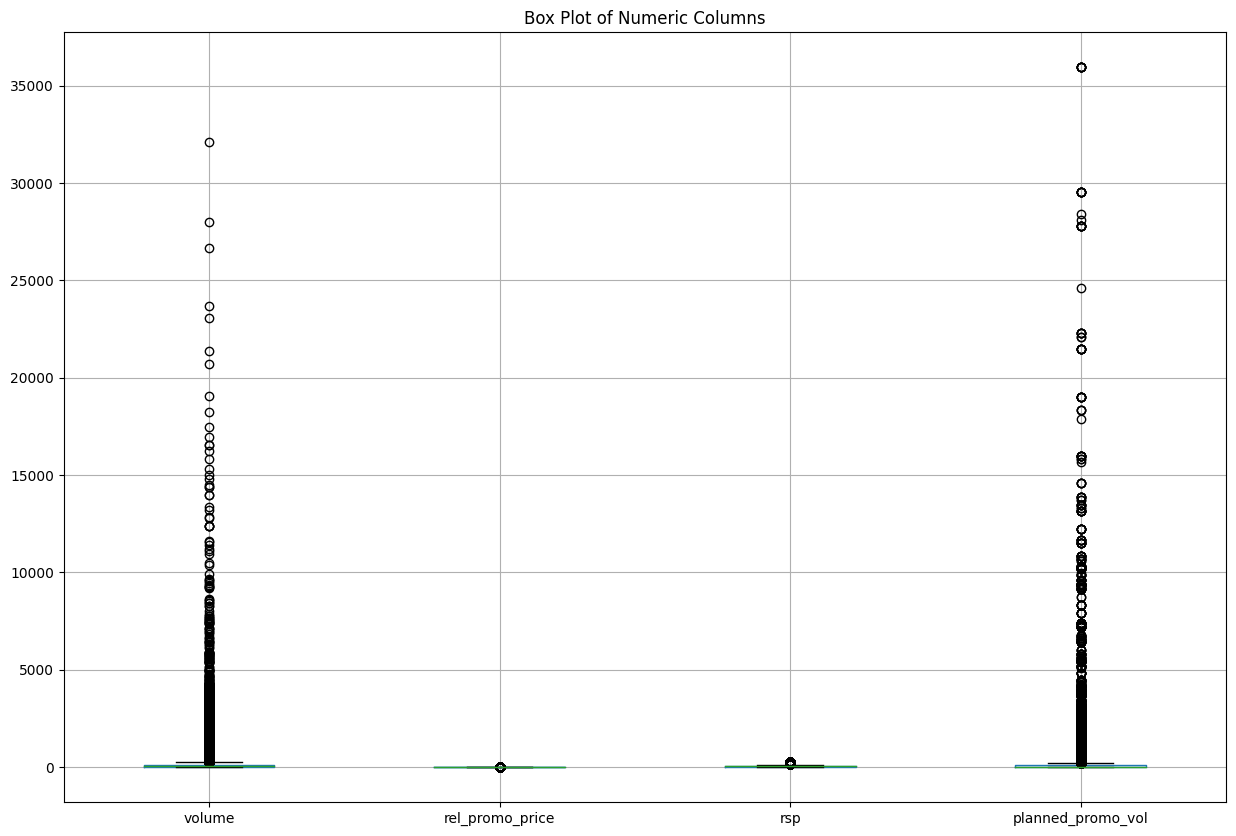

Indices of outliers using Z-scores: [   198    240    351 ... 300438 300517 300708]


In [30]:
from scipy import stats


plt.figure(figsize=(15, 10))
df.boxplot(column=['volume', 'rel_promo_price', 'rsp', 'planned_promo_vol'])
plt.title('Box Plot of Numeric Columns')
plt.show()

z_scores = np.abs(stats.zscore(df[['volume', 'rel_promo_price', 'rsp', 'planned_promo_vol']], nan_policy='omit'))
outliers_z = (z_scores > 3).any(axis=1)
outliers_z_indices = np.where(outliers_z)[0]

print(f"Indices of outliers using Z-scores: {outliers_z_indices}")

In [31]:
df['planned_promo_vol'] = df.apply(lambda row: mean_promo_vol_map[row['product_code']]
                                   if pd.isna(row['planned_promo_vol']) and count_promo_vol_map[row['product_code']] > 1
                                   else 0 if pd.isna(row['planned_promo_vol']) else row['planned_promo_vol'],
                                   axis=1)

In [32]:
df = df.drop(df.columns[0], axis=1)  # Drop the first column


In [33]:
df

,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code,year,month,day,dayofweek
0,2022-05-01,61.0,1.0000,0,0,0,32.9500,0.0000,1,2022,5,1,6
1,2022-05-01,102.0,1.0000,0,0,0,40.1204,0.0000,2,2022,5,1,6
2,2022-05-01,52.0,1.0000,0,0,0,32.7825,0.0000,3,2022,5,1,6
3,2022-05-01,309.0,0.9091,1,0,0,41.3318,0.0001,4,2022,5,1,6
4,2022-05-01,106.0,0.9091,1,0,0,44.6441,0.0001,5,2022,5,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300763,2024-06-05,63.0,0.8333,1,0,1,77.9900,107.7537,156,2024,6,5,2
300764,2024-06-05,26.0,1.0000,0,0,0,77.4567,0.0000,147,2024,6,5,2
300765,2024-06-05,71.0,1.0000,0,0,0,18.0111,0.0000,85,2024,6,5,2
300766,2024-06-05,0.0,1.0000,0,0,0,35.9900,0.0000,98,2024,6,5,2


In [34]:
def split_time_series(df, prediction_length):
    """
    Function to split off a df of time series into time series, where the second time series
    includes the last `prediction_length` time steps.
    """
    # Create an empty dataframe for train and validation sets
    train_df = pd.DataFrame()
    validation_df = pd.DataFrame()

    # Group by the time series identifier
    grouped = df.groupby(time_series_id_col)

    # Iterate over each group (i.e., each individual time series)
    for item_id, group in grouped:
        # Sort the group by date if it's not already sorted
        group = group.sort_index()

        # Define the split point
        split_point = len(group) - prediction_length

        # Split the data into training and validation sets
        train_group = group.iloc[:split_point]
        validation_group = group

        # Append to the respective dataframes
        train_df = pd.concat([train_df, train_group])
        validation_df = pd.concat([validation_df, validation_group])

    return train_df, validation_df

train_df, test_df = split_time_series(df, prediction_length)

In [29]:
# Create sequences
X_train, y_train = create_sequences(train_df, sequence_length, feature_cols, target_col)
X_test, y_test = create_sequences(test_df, sequence_length, feature_cols, target_col)

# Split sequences into training and validation sets
X_train_val_split = int(0.8 * len(X_train))
X_train_val = X_train[:X_train_val_split]
y_train_val = y_train[:X_train_val_split]
X_test_val = X_test[X_train_val_split:]
y_test_val = y_test[X_train_val_split:]



In [35]:
df.columns

Index(['sales_date', 'volume', 'rel_promo_price', 'is_promo',
       'is_single_price_promo', 'is_multibuy_promo', 'rsp',
       'planned_promo_vol', 'product_code', 'year', 'month', 'day',
       'dayofweek'],
      dtype='object')

**train_df**

test_df

In [36]:
train_df

,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code,year,month,day,dayofweek
0,2022-05-01,61.0,1.0,0,0,0,32.9500,0.0,1,2022,5,1,6
599,2022-05-02,61.0,1.0,0,0,0,32.9500,0.0,1,2022,5,2,0
843,2022-05-03,60.0,1.0,0,0,0,32.9500,0.0,1,2022,5,3,1
1409,2022-05-04,61.0,1.0,0,0,0,32.9656,0.0,1,2022,5,4,2
1485,2022-05-05,49.0,1.0,0,0,0,32.9656,0.0,1,2022,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287531,2024-05-04,15.0,1.0,0,0,0,16.0679,0.0,411,2024,5,4,5
287796,2024-05-05,10.0,1.0,0,0,0,16.0679,0.0,411,2024,5,5,6
288185,2024-05-06,12.0,1.0,0,0,0,16.0679,0.0,411,2024,5,6,0
288598,2024-05-07,14.0,1.0,0,0,0,16.0679,0.0,411,2024,5,7,1


In [37]:
test_df

,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code,year,month,day,dayofweek
0,2022-05-01,61.0,1.0,0,0,0,32.9500,0.0,1,2022,5,1,6
599,2022-05-02,61.0,1.0,0,0,0,32.9500,0.0,1,2022,5,2,0
843,2022-05-03,60.0,1.0,0,0,0,32.9500,0.0,1,2022,5,3,1
1409,2022-05-04,61.0,1.0,0,0,0,32.9656,0.0,1,2022,5,4,2
1485,2022-05-05,49.0,1.0,0,0,0,32.9656,0.0,1,2022,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299032,2024-06-01,15.0,1.0,0,0,0,16.0679,0.0,411,2024,6,1,5
299331,2024-06-02,7.0,1.0,0,0,0,16.0679,0.0,411,2024,6,2,6
299673,2024-06-03,13.0,1.0,0,0,0,16.0679,0.0,411,2024,6,3,0
300005,2024-06-04,6.0,1.0,0,0,0,16.0679,0.0,411,2024,6,4,1


In [72]:
test_df[test_df['product_code']==33]

,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code,year,month,day,dayofweek
32,2022-05-01,31.0,1.0000,0,0,0,83.0290,0.0000,33,2022,5,1,6
638,2022-05-02,36.0,1.0000,0,0,0,83.0290,0.0000,33,2022,5,2,0
1094,2022-05-03,45.0,1.0000,0,0,0,83.0589,0.0000,33,2022,5,3,1
1300,2022-05-04,41.0,1.0000,0,0,0,83.1293,0.0000,33,2022,5,4,2
1651,2022-05-05,27.0,1.0000,0,0,0,83.1293,0.0000,33,2022,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298865,2024-06-01,133.0,0.7905,1,1,0,104.9900,157.5558,33,2024,6,1,5
299129,2024-06-02,118.0,0.7905,1,1,0,104.9900,157.5558,33,2024,6,2,6
299789,2024-06-03,83.0,0.7905,1,1,0,104.9900,129.7062,33,2024,6,3,0
300085,2024-06-04,106.0,0.7905,1,1,0,104.9900,129.7062,33,2024,6,4,1


In [74]:
df2 = df.loc[df['product_code'] == 1, ['sales_date', 'volume']]

In [47]:
df[df['product_code']==50]

,sales_date,volume,rel_promo_price,is_promo,is_single_price_promo,is_multibuy_promo,rsp,planned_promo_vol,product_code,year,month,day,dayofweek
49,2022-05-01,120.0,1.0000,0,0,0,21.6953,0.000,50,2022,5,1,6
464,2022-05-02,113.0,1.0000,0,0,0,22.0319,0.000,50,2022,5,2,0
1005,2022-05-03,85.0,1.0000,0,0,0,22.0319,0.000,50,2022,5,3,1
1198,2022-05-04,87.0,1.0000,0,0,0,22.0319,0.000,50,2022,5,4,2
1710,2022-05-05,86.0,1.0000,0,0,0,22.0319,0.000,50,2022,5,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298750,2024-06-01,152.0,0.7767,1,0,1,42.4900,312.906,50,2024,6,1,5
299346,2024-06-02,117.0,0.7767,1,0,1,42.4900,312.906,50,2024,6,2,6
299731,2024-06-03,91.0,0.7561,1,0,1,42.9844,0.000,50,2024,6,3,0
300117,2024-06-04,69.0,0.7561,1,0,1,42.9844,0.000,50,2024,6,4,1


In [39]:
def train_ffnn_predictor(df):
    """
    A very basic feed forward predictor using GluonTS with a training and validation set.
    """
    df = df.copy()
    df.set_index(date_col, inplace=True) # GluonTS wants the timestamp to be the index

    # Split the training data into training and validation sets
    train_df, val_df = split_time_series(df, prediction_length)
    # Create the Pandas datasets
    train_ds = PandasDataset.from_long_dataframe(train_df,
                                                target=target_col,
                                                item_id=time_series_id_col,
                                                freq=freq)

    val_ds = PandasDataset.from_long_dataframe(val_df,
                                                target=target_col,
                                                item_id=time_series_id_col,
                                                freq=freq)

    # Train a feed forward estimator
    estimator = SimpleFeedForwardEstimator(
        num_hidden_dimensions=[10],
        prediction_length=prediction_length,
        context_length=100,
        trainer=Trainer(ctx="cpu", epochs=10, learning_rate=1e-3, num_batches_per_epoch=100),
    )
    predictor = estimator.train(training_data=train_ds, validation_data=val_ds)
    return predictor

ffnn_predictor = train_ffnn_predictor(train_df)

100%|██████████| 100/100 [00:03<00:00, 30.28it/s, epoch=1/10, avg_epoch_loss=5.77]
13it [00:00, 35.41it/s, epoch=1/10, validation_avg_epoch_loss=5.35]
100%|██████████| 100/100 [00:02<00:00, 33.34it/s, epoch=2/10, avg_epoch_loss=5.45]
13it [00:00, 37.92it/s, epoch=2/10, validation_avg_epoch_loss=5.28]
100%|██████████| 100/100 [00:04<00:00, 22.61it/s, epoch=3/10, avg_epoch_loss=5.3]
13it [00:00, 35.33it/s, epoch=3/10, validation_avg_epoch_loss=5.23]
100%|██████████| 100/100 [00:03<00:00, 32.73it/s, epoch=4/10, avg_epoch_loss=5.28]
13it [00:00, 37.99it/s, epoch=4/10, validation_avg_epoch_loss=5.21]
100%|██████████| 100/100 [00:03<00:00, 32.38it/s, epoch=5/10, avg_epoch_loss=5.2]
13it [00:00, 36.85it/s, epoch=5/10, validation_avg_epoch_loss=5.21]
100%|██████████| 100/100 [00:07<00:00, 13.75it/s, epoch=6/10, avg_epoch_loss=5.22]
13it [00:00, 13.80it/s, epoch=6/10, validation_avg_epoch_loss=5.17]
100%|██████████| 100/100 [00:06<00:00, 16.19it/s, epoch=7/10, avg_epoch_loss=5.19]
13it [00:00, 

In [40]:
def train_ffnn_predictor(df):
    """
    A very basic feed forward predictor using GluonTS with a training and validation set.
    """
    df = df.copy()
    df.set_index(date_col, inplace=True) # GluonTS wants the timestamp to be the index

    # Split the training data into training and validation sets
    train_df, val_df = split_time_series(df, prediction_length)
    # Create the Pandas datasets
    train_ds = PandasDataset.from_long_dataframe(train_df,
                                                target=target_col,
                                                item_id=time_series_id_col,
                                                freq=freq)

    val_ds = PandasDataset.from_long_dataframe(val_df,
                                                target=target_col,
                                                item_id=time_series_id_col,
                                                freq=freq)

    # Train a feed forward estimator
    estimator = SimpleFeedForwardEstimator(
        num_hidden_dimensions=[10],
        prediction_length=prediction_length,
        context_length=100,
        trainer=Trainer(ctx="cpu", epochs=10, learning_rate=1e-3, num_batches_per_epoch=100),
    )
    predictor = estimator.train(training_data=train_ds, validation_data=val_ds)
    return predictor

ffnn_predictor = train_ffnn_predictor(train_df)

100%|██████████| 100/100 [00:04<00:00, 24.85it/s, epoch=1/10, avg_epoch_loss=5.72]
13it [00:00, 33.22it/s, epoch=1/10, validation_avg_epoch_loss=5.38]
100%|██████████| 100/100 [00:03<00:00, 31.41it/s, epoch=2/10, avg_epoch_loss=5.41]
13it [00:00, 37.65it/s, epoch=2/10, validation_avg_epoch_loss=5.27]
100%|██████████| 100/100 [00:03<00:00, 31.80it/s, epoch=3/10, avg_epoch_loss=5.29]
13it [00:00, 37.56it/s, epoch=3/10, validation_avg_epoch_loss=5.22]
100%|██████████| 100/100 [00:03<00:00, 26.12it/s, epoch=4/10, avg_epoch_loss=5.26]
13it [00:00, 25.87it/s, epoch=4/10, validation_avg_epoch_loss=5.21]
100%|██████████| 100/100 [00:03<00:00, 29.96it/s, epoch=5/10, avg_epoch_loss=5.21]
13it [00:00, 37.69it/s, epoch=5/10, validation_avg_epoch_loss=5.19]
100%|██████████| 100/100 [00:03<00:00, 32.50it/s, epoch=6/10, avg_epoch_loss=5.21]
13it [00:00, 36.12it/s, epoch=6/10, validation_avg_epoch_loss=5.19]
100%|██████████| 100/100 [00:03<00:00, 32.37it/s, epoch=7/10, avg_epoch_loss=5.19]
13it [00:00

In [95]:
df.columns

Index(['sales_date', 'volume', 'rel_promo_price', 'is_promo',
       'is_single_price_promo', 'is_multibuy_promo', 'rsp',
       'planned_promo_vol', 'product_code', 'year', 'month', 'day',
       'dayofweek'],
      dtype='object')

In [41]:
def make_predictions(predictor, df, feature_columns=[]):
    """
    Make predictions with a GluonTS predictor and return them as a df.
    """
    df = df.copy()
    df = df.fillna(0) # Replace any NaNs with 0
    df.set_index(df.columns[0], inplace=True) # GluonTS wants the timestamp to be the index
    dataset = PandasDataset.from_long_dataframe(df,
                                                target=target_col,
                                                item_id=time_series_id_col,
                                                freq=freq,
                                                feat_dynamic_real=feature_columns)

    forecast_it, _ = make_evaluation_predictions(
        dataset=dataset,
        predictor=predictor,
        num_samples=100,  # number of sample paths we want for evaluation
    )
    forecasts = list(forecast_it)

    # Initialize a list to hold all the records before converting to a DataFrame
    records = []
    for forecast in forecasts:
        item_id = forecast.item_id
        start_timestamp = forecast.start_date.start_time

        # GluonTS does probabilistic forecasting with a number of samples
        # Calculate mean targets across all samples for each date position
        mean_targets = forecast.samples.mean(axis=0)
        for i, target in enumerate(mean_targets):
            # Calculate what the timestamp should be for each predicted target
            timestamp = start_timestamp + i * pd.to_timedelta(freq)
            # Store the prediction as a record
            records.append({date_col: timestamp, time_series_id_col: item_id, target_col: target})

    # Convert the predictions from a list of records into a DataFrame
    preds_df = pd.DataFrame(records)
    preds_df.set_index(date_col, inplace=True)
    return preds_df

output_preds_path = "my_predictions.csv"
preds_df = make_predictions(ffnn_predictor, test_df)
preds_df.to_csv(output_preds_path)

MODEL EVALUATION

In [42]:
def compute_error(actuals_path, preds_path):
    """
    Computes the relative error and relative bias from csv files of predictions and actual targets.
    """
    # Read predicted and actuals from their respective files if not already provided
    actuals_df = pd.read_csv(actuals_path, parse_dates=[date_col])
    preds_df = pd.read_csv(preds_path, parse_dates=[date_col])

    # Rename 'target' column to add suffix for 'preds' and 'actuals' respectively
    actuals_df.rename(columns={target_col: f'{target_col}_actuals'}, inplace=True)
    preds_df.rename(columns={target_col: f'{target_col}_preds'}, inplace=True)

    # Merge the two dataframes on the timestamp column and the time series identifier column
    df = pd.merge(actuals_df, preds_df, on=[date_col, time_series_id_col])

    actual_var = target_col + '_actuals'
    pred_var = target_col +'_preds'
    measure_level = [time_series_id_col, date_col]

    # Drop all unecessary columns
    keep_vars = list(set(measure_level + [actual_var, pred_var]))
    df_filtered = df.dropna(subset=[actual_var])[keep_vars]
    df_filtered.rename(columns={actual_var: 'A', pred_var: 'P'}, inplace=True)

    # Group by measure_level and aggregate A and P
    grouped = df_filtered.groupby(measure_level, observed=False).agg(A=('A', 'sum'), P=('P', 'sum'))

    # Calculate the errors initially at measure_level (not the absolute sum yet)
    grouped['E'] = (grouped['A'] - grouped['P']).abs()

    # Aggregate all data to one row
    grouped = grouped.sum()

    # Calculate relative error (rE) and relative bias (rB)
    grouped['rE'] = grouped['E'] / grouped['A']
    grouped['rB'] = (grouped['P'] - grouped['A']) / grouped['A']
    return grouped

output_preds_path = "my_predictions.csv"
report = compute_error(data_path, output_preds_path)
print("Error Report:")
print(report)

forecast_acc = (1 - (report.rE)) * 100
forecast_bias = report.rB * 100
acc_bias = forecast_acc - 0.5 * abs(forecast_bias)
print(f"Forecast Accuracy is: {forecast_acc:.2f}%")
print(f"Forecast Bias is: {forecast_bias:.2f}%")
print(f"Bias-weighted Accuracy: {acc_bias:.2f}%")

Error Report:
A     1.199319e+06
P     1.249749e+06
E     5.215650e+05
rE    4.348843e-01
rB    4.204859e-02
dtype: float64
Forecast Accuracy is: 56.51%
Forecast Bias is: 4.20%
Bias-weighted Accuracy: 54.41%


In [91]:
df.columns

Index(['sales_date', 'volume', 'rel_promo_price', 'is_promo',
       'is_single_price_promo', 'is_multibuy_promo', 'rsp',
       'planned_promo_vol', 'product_code', 'year', 'month', 'day',
       'dayofweek'],
      dtype='object')

In [49]:
from gluonts.torch import DeepAREstimator

def train_deep_ar_predictor(df, feature_columns):
    """
    A more advance model able to make use of features.
    """
    df = df.copy()
    df.set_index(date_col, inplace=True) # GluonTS wants the timestamp to be the index
    df = df.fillna(0) # Replace any NaNs with 0

    # Split the training data into training and validation sets
    train_df, val_df = split_time_series(df, prediction_length)
    # Create the Pandas datasets
    train_ds = PandasDataset.from_long_dataframe(train_df,
                                                target=target_col,
                                                item_id=time_series_id_col,
                                                freq=freq,
                                                feat_dynamic_real=feature_columns)

    val_ds = PandasDataset.from_long_dataframe(val_df,
                                                target=target_col,
                                                item_id=time_series_id_col,
                                                freq=freq,
                                                feat_dynamic_real=feature_columns)

    # Train a feed forward estimator
    estimator = DeepAREstimator(
        prediction_length=prediction_length,
        freq=freq,
        num_feat_dynamic_real=len(feature_columns),
        trainer_kwargs={"max_epochs": 10}
    )
    predictor = estimator.train(training_data=train_ds, validation_data=val_ds)
    return predictor

# Define which features to use and train
feature_columns=['is_promo', 'rsp','is_multibuy_promo','is_single_price_promo','day','month'] #Added more predictors
deep_ar_predictor = train_deep_ar_predictor(train_df, feature_columns)

# Make predictions
output_preds_path = "my_deep_ar_predictions.csv"
preds_df = make_predictions(deep_ar_predictor, test_df, feature_columns)
preds_df.to_csv(output_preds_path)

# Evaluate
report = compute_error(data_path, output_preds_path)
print("DeepAR Error Report:")
print(report)

forecast_acc = (1 - (report.rE)) * 100
forecast_bias = report.rB * 100
acc_bias = forecast_acc - 0.5 * abs(forecast_bias)
print(f"Forecast Accuracy is: {forecast_acc:.2f}%")
print(f"Forecast Bias is: {forecast_bias:.2f}%")
print(f"Bias-weighted Accuracy: {acc_bias:.2f}%")

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name  | Type        | Params | In sizes                                                           | Out sizes   
--------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 26.8 K | [[1, 1], [1, 1], [1, 1120, 10], [1, 1120], [1, 1120], [1, 28, 10]] | [1, 100, 28]
--------------------------------------------------------------------------------------------------------------------------
26.8 K    Trainable par

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 50: 'val_loss' reached 5.07234 (best 5.07234), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 50: 'val_loss' reached 5.07234 (best 5.07234), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=0-step=50.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 100: 'val_loss' reached 4.91115 (best 4.91115), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 100: 'val_loss' reached 4.91115 (best 4.91115), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=1-step=100.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 150: 'val_loss' reached 4.69943 (best 4.69943), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=2-step=150.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 150: 'val_loss' reached 4.69943 (best 4.69943), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=2-step=150.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 200: 'val_loss' reached 4.60406 (best 4.60406), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=3-step=200.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 3, global step 200: 'val_loss' reached 4.60406 (best 4.60406), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=3-step=200.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 250: 'val_loss' reached 4.55489 (best 4.55489), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=4-step=250.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 4, global step 250: 'val_loss' reached 4.55489 (best 4.55489), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=4-step=250.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 300: 'val_loss' reached 4.51848 (best 4.51848), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=5-step=300.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 5, global step 300: 'val_loss' reached 4.51848 (best 4.51848), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=5-step=300.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 350: 'val_loss' reached 4.48288 (best 4.48288), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=6-step=350.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 6, global step 350: 'val_loss' reached 4.48288 (best 4.48288), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=6-step=350.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 400: 'val_loss' reached 4.44526 (best 4.44526), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=7-step=400.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 7, global step 400: 'val_loss' reached 4.44526 (best 4.44526), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=7-step=400.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 450: 'val_loss' reached 4.42872 (best 4.42872), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=8-step=450.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 8, global step 450: 'val_loss' reached 4.42872 (best 4.42872), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=8-step=450.ckpt' as top 1


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 500: 'val_loss' reached 4.40385 (best 4.40385), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=9-step=500.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 9, global step 500: 'val_loss' reached 4.40385 (best 4.40385), saving model to '/content/lightning_logs/version_13/checkpoints/epoch=9-step=500.ckpt' as top 1
INFO: `Trainer.fit` stopped: `max_epochs=10` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


DeepAR Error Report:
A     1.199319e+06
P     1.283168e+06
E     4.726879e+05
rE    3.941303e-01
rB    6.991361e-02
dtype: float64
Forecast Accuracy is: 60.59%
Forecast Bias is: 6.99%
Bias-weighted Accuracy: 57.09%
